# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")


# Reading the data from the csv file using read_csv() method
df = pd.read_csv('Churn_Modelling.csv')

# Exploratory data analysis

In [2]:
# Checking any 5 random rows from the dataframe
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4580,4581,15791842,Johnstone,478,France,Female,32,6,71187.24,1,1,1,110593.62,0
8845,8846,15635703,Chu,729,Germany,Female,39,1,131513.26,1,1,1,193715.00,0
4315,4316,15763980,Beneventi,632,Germany,Male,30,1,58668.02,1,1,1,78670.52,0
478,479,15677538,Nwokike,569,France,Male,38,7,0.00,1,1,1,108469.20,0
2504,2505,15625942,McDonald,619,Spain,Female,45,0,0.00,2,0,0,113645.40,0


In [3]:
# Checking the shape of the dataframe
df.shape

(10000, 14)

In [4]:
# Checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Optimizing the memory occupied by using the appropriate datatypes

int_cols = df.select_dtypes(include=np.int64)
int_cols = int_cols.columns
df[int_cols] = df[int_cols].astype(np.int32)

float_cols = df.select_dtypes(include=np.float64)
float_cols = float_cols.columns
df[float_cols] = df[float_cols].astype(np.float32)

In [6]:
# Let's get some descriptive information about our dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.890625,1.530200,0.70550,0.515100,100090.234375,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.406250,0.581654,0.45584,0.499797,57510.492188,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.109375,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.539062,1.000000,1.00000,1.000000,100193.914062,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.238281,2.000000,1.00000,1.000000,149388.253906,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.093750,4.000000,1.00000,1.000000,199992.484375,1.000000


In [7]:
# Let's check the percentage of null values
df.isnull().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [8]:
# Let's check if there are any duplicated values
df.duplicated().sum()

0

<AxesSubplot:ylabel='Exited'>

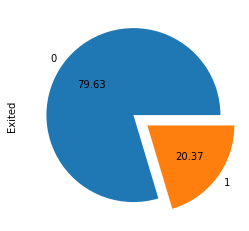

In [9]:
# Distribution of data in target variable
ex = (0,0.2)
df['Exited'].value_counts().plot(kind='pie',autopct='%.2f',explode= ex)

Let's visualize the distribution of some numerical features so that we could decide whether to use IQR or z SCORE method for detecting and dealing with outliers

In [20]:
df['CreditScore'].mode()

0    850
Name: CreditScore, dtype: int32

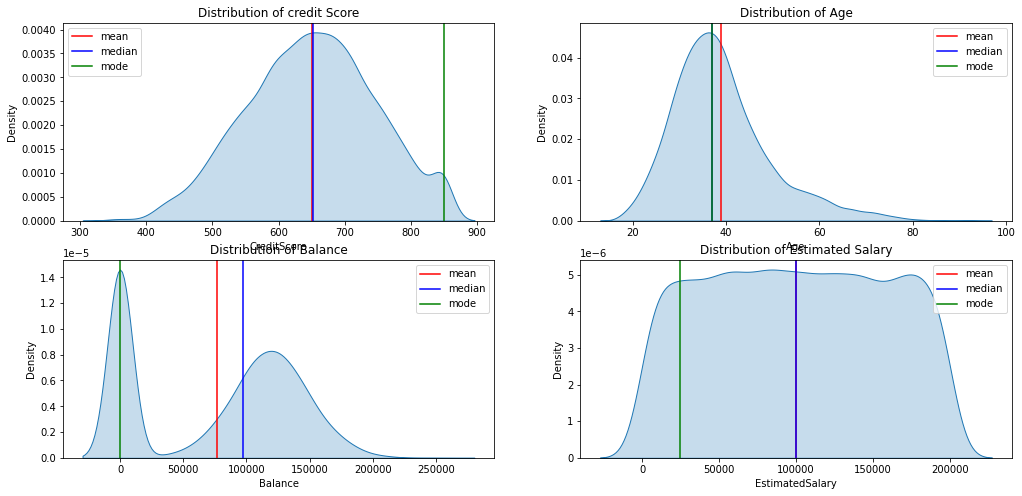

In [25]:
fig,ax = plt.subplots(2,2,figsize=(17,8))

sns.kdeplot(df['CreditScore'],shade=True,ax = ax[0][0]).set(title='Distribution of credit Score')
ax[0][0].axvline(df['CreditScore'].mean(),color='red',label='mean')
ax[0][0].axvline(df['CreditScore'].median(),color='blue',label='median')
ax[0][0].axvline(df['CreditScore'].mode()[0],color='green',label='mode')
ax[0][0].legend()

sns.kdeplot(df['Age'],shade=True,ax = ax[0][1]).set(title='Distribution of Age')
ax[0][1].axvline(df['Age'].mean(),color='red',label='mean')
ax[0][1].axvline(df['Age'].median(),color='blue',label='median')
ax[0][1].axvline(df['Age'].mode()[0],color='green',label='mode')
ax[0][1].legend()

sns.kdeplot(df['Balance'],shade=True,ax = ax[1][0]).set(title='Distribution of Balance')
ax[1][0].axvline(df['Balance'].mean(),color='red',label='mean')
ax[1][0].axvline(df['Balance'].median(),color='blue',label='median')
ax[1][0].axvline(df['Balance'].mode()[0],color='green',label='mode')
ax[1][0].legend()

sns.kdeplot(df['EstimatedSalary'],shade=True,ax = ax[1][1]).set(title='Distribution of Estimated Salary')
ax[1][1].axvline(df['EstimatedSalary'].mean(),color='red',label='mean')
ax[1][1].axvline(df['EstimatedSalary'].median(),color='blue',label='median')
ax[1][1].axvline(df['EstimatedSalary'].mode()[0],color='green',label='mode')
ax[1][1].legend()

plt.show()

Since none of the above feature is having normal or sort of normal distribution thus we will use inter quartile range method for the detecting and handing outliers

[Text(0.5, 1.0, 'Boxplot of Estimated Salary')]

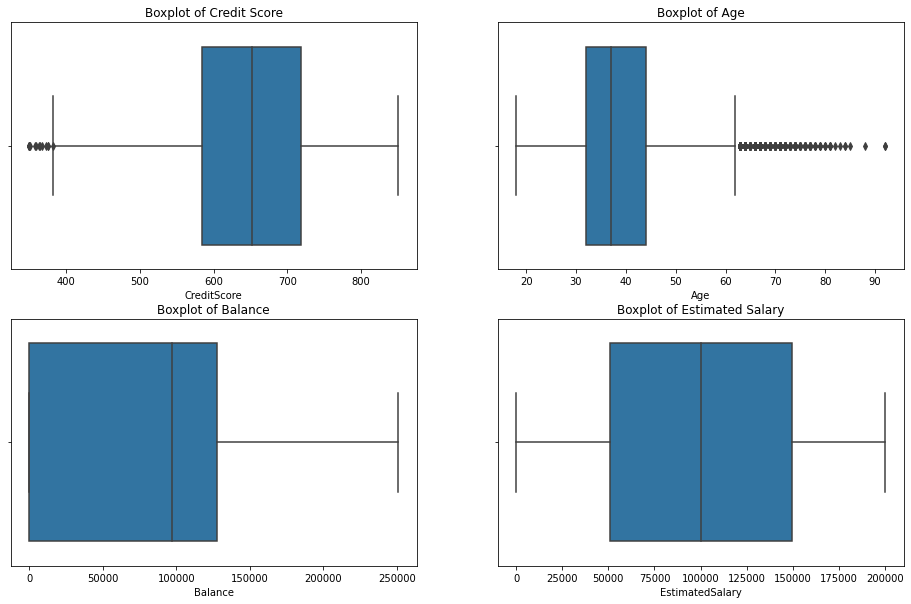

In [32]:
fig,ax = plt.subplots(2,2,figsize=(16,10))

sns.boxplot(x = df['CreditScore'],ax = ax[0][0]).set(title='Boxplot of Credit Score')
sns.boxplot(x = df['Age'],ax = ax[0][1]).set(title='Boxplot of Age')
sns.boxplot(x = df['Balance'],ax = ax[1][0]).set(title='Boxplot of Balance')
sns.boxplot(x = df['EstimatedSalary'],ax = ax[1][1]).set(title='Boxplot of Estimated Salary')

As we can clearly see that Age and Credit Score features have some outliers and now to handle these outliers we can either remove them or we can simply cap them. So we will do and compare the distribution before and after remvoing/capping outliers with respect to the original distribution

In [33]:
# Let's create a copy 
cap_df = df[['Age','CreditScore']].copy()
remove_df = df[['Age','CreditScore']].copy()

In [36]:
# Creating function for finding upper and lower limit of the feature
def find_ul_ll(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    Upper_lmt = q3 + (1.5*IQR)
    Lower_lmt = q1 - (1.5*IQR)
    return [Upper_lmt,Lower_lmt]

In [37]:
# Let's cap the outliers
for col in cap_df.columns:
    lmts = find_ul_ll(cap_df[col])
    cap_df[col] = np.where(cap_df[col] > lmts[0],lmts[0], np.where(cap_df[col]<lmts[1],lmts[1],cap_df[col]))

In [50]:
# Let's remove the outliers
lmts_age = find_ul_ll(remove_df['Age'])
remove_df = remove_df[remove_df['Age'] < lmts_age[0]]

lmts_creditsc = find_ul_ll(remove_df['CreditScore'])
remove_df = remove_df[remove_df['CreditScore'] > lmts_creditsc[1]]

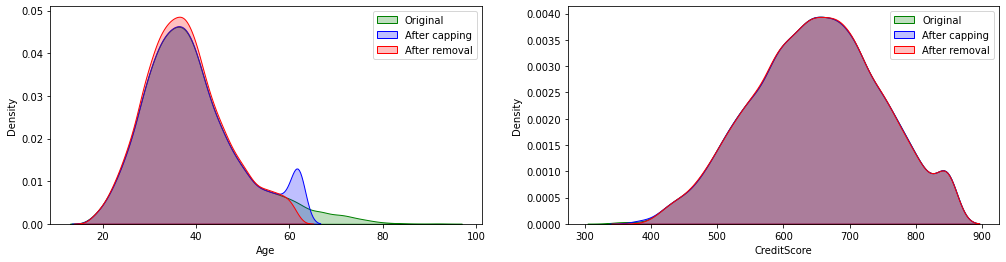

In [68]:
# Let's now visualize the change in distribution after capping/remvoing outliers
fig,ax = plt.subplots(1,2,figsize=(17,4))

sns.kdeplot(df['Age'],shade=True,ax = ax[0],color='green',label='Original')
sns.kdeplot(cap_df['Age'],shade=True,ax = ax[0],color='blue',label='After capping')
sns.kdeplot(remove_df['Age'],shade=True,ax = ax[0],color='red',label='After removal')
ax[0].legend()

sns.kdeplot(df['CreditScore'],shade=True,ax = ax[1],color='green',label='Original')
sns.kdeplot(cap_df['CreditScore'],shade=True,ax = ax[1],color='blue',label='After capping')
sns.kdeplot(remove_df['CreditScore'],shade=True,ax = ax[1],color='red',label='After removal')
ax[1].legend()

plt.show()

In [9]:
# Let's drop some unnecessary features from the dataframe
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

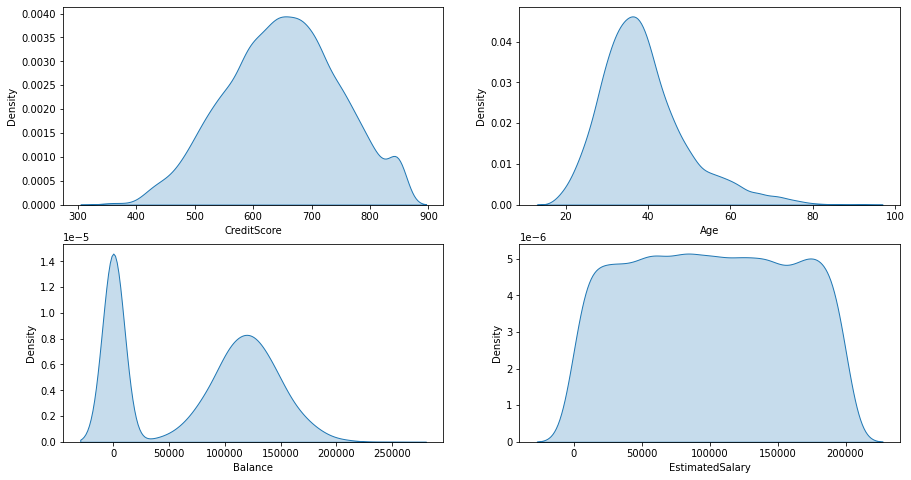

In [11]:
# Let's check the shape of distributions
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.kdeplot(df['CreditScore'], shade=True, ax=ax[0][0])
sns.kdeplot(df['Age'], ax=ax[0][1],shade=True)
sns.kdeplot(df['Balance'], ax=ax[1][0],shade=True)
sns.kdeplot(df['EstimatedSalary'], ax=ax[1][1],shade=True)

plt.show()

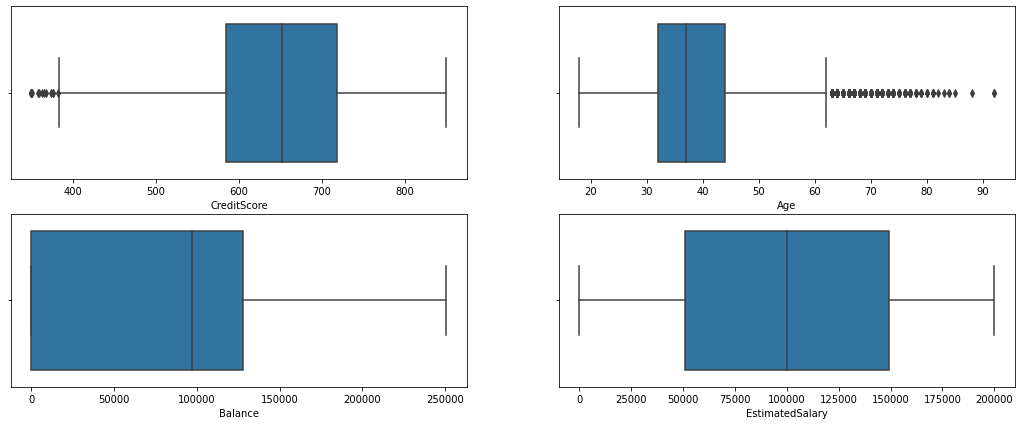

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(18, 7))

sns.boxplot(x = df['CreditScore'], ax=ax[0][0])
sns.boxplot(x = df['Age'], ax=ax[0][1])
sns.boxplot(x = df['Balance'], ax=ax[1][0])
sns.boxplot(x = df['EstimatedSalary'], ax=ax[1][1])

plt.show()

[Text(0.5, 1.0, 'Tenure comparsion regarding exits')]

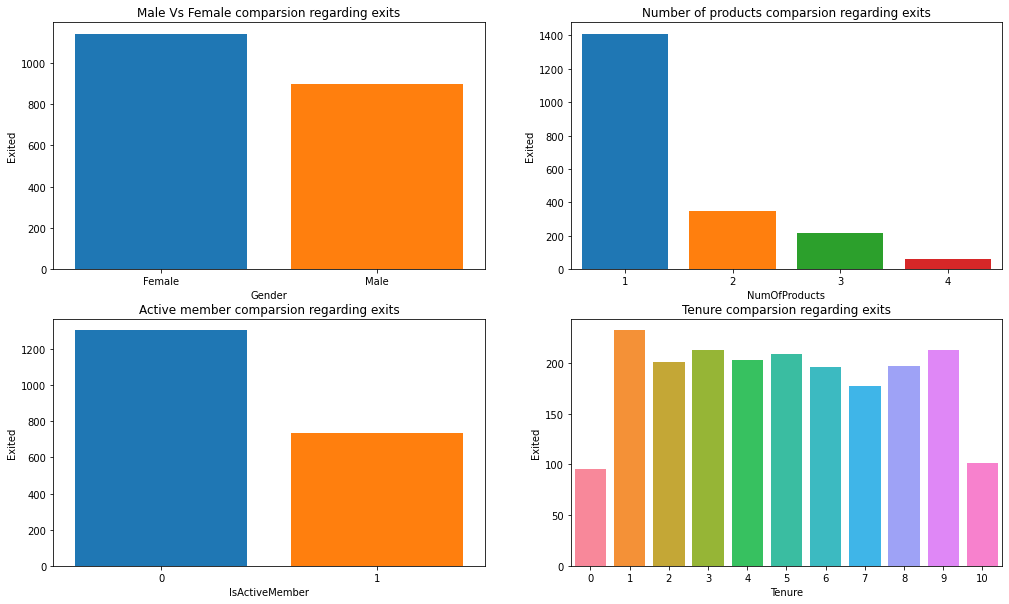

In [13]:
# Let's plot barplots to find out answer to the questions
fig,ax = plt.subplots(2,2,figsize =(17,10))

temp1 = df.groupby('Gender')['Exited'].sum()
temp2 = df.groupby('NumOfProducts')['Exited'].sum()
temp3 = df.groupby('IsActiveMember')['Exited'].sum()
temp4 = df.groupby('Tenure')['Exited'].sum()

sns.barplot(x = temp1.index , y = temp1,saturation=2,ax = ax[0][0]).set(title='Male Vs Female comparsion regarding exits')
sns.barplot(x = temp2.index , y = temp2,saturation=2,ax = ax[0][1]).set(title='Number of products comparsion regarding exits')
sns.barplot(x = temp3.index , y = temp3,saturation=2,ax = ax[1][0]).set(title='Active member comparsion regarding exits')
sns.barplot(x = temp4.index , y = temp4,saturation=2,ax = ax[1][1]).set(title='Tenure comparsion regarding exits')

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

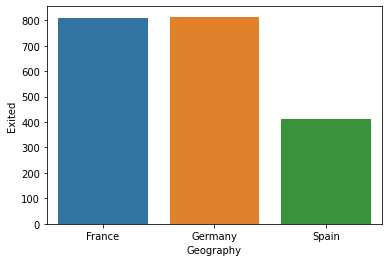

In [14]:
temp5 = df.groupby('Geography')['Exited'].sum()
sns.barplot(x = temp5.index , y = temp5,)

# Data processing

- Removal of outliers

In [15]:
# Let's compare the distribution of CreditScore feature before and after (capping) outliers
q1 = df['CreditScore'].quantile(0.25)
q3 = df['CreditScore'].quantile(0.75)
IQR = q3-q1
Lower_lmt = q1-(1.5*IQR)
Upper_lmt = q3 + (1.5*IQR)

temp = df.copy()

In [17]:
# Let's cap the outliers
temp['CreditScore'] = np.where(temp['CreditScore'] > Upper_lmt, Upper_lmt, 
                             np.where(temp['CreditScore'] < Lower_lmt, Lower_lmt, temp['CreditScore']))

[Text(0.5, 1.0, 'Boxplot after capping outliers')]

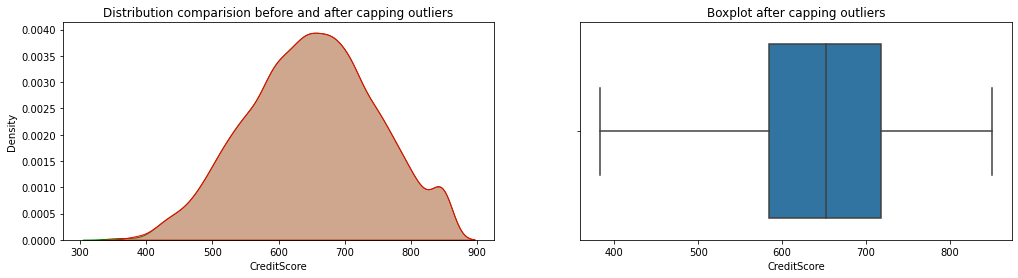

In [22]:
# Visualize the distribution before and after capping the outliers
fig,ax = plt.subplots(1,2,figsize = (17,4))

sns.kdeplot(df['CreditScore'],shade=True,color='green',ax = ax[0])
sns.kdeplot(temp['CreditScore'],shade=True,color='red',ax = ax[0]).set(title='Distribution comparision before and after capping outliers')

sns.boxplot(x = temp['CreditScore'],ax = ax[1]).set(title='Boxplot after capping outliers')

Since the distribution of CreditScore feature is not changing a lot after capping the outliers thus we will move on with capping the outliers in original dataframe

In [23]:
df['CreditScore'] = np.where(df['CreditScore'] > Upper_lmt, Upper_lmt, 
                             np.where(df['CreditScore'] < Lower_lmt, Lower_lmt, df['CreditScore']))

[Text(0.5, 1.0, 'Distribution comparision before and after Removing outliers')]

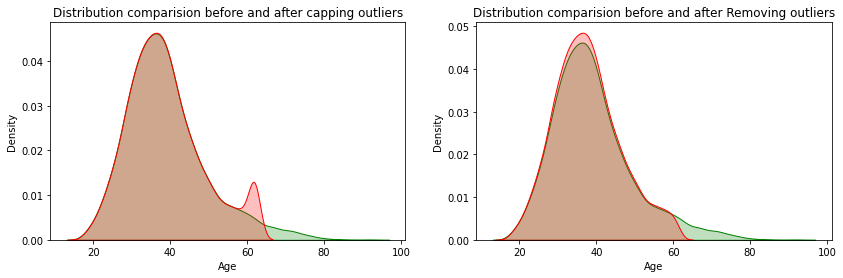

In [30]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
IQR = q3-q1
Lower_lmt = q1-(1.5*IQR)
Upper_lmt = q3 + (1.5*IQR)

# Capping the outliers
Temp1 = np.where(df['Age'] > Upper_lmt, Upper_lmt, 
                             np.where(df['Age'] < Lower_lmt, Lower_lmt, df['Age']))
# Remvoing the outliers
Temp2 = df[df['Age']<Upper_lmt]

# Visualize the distribution before and after capping the outliers
fig,ax = plt.subplots(1,2,figsize = (14,4))

sns.kdeplot(df['Age'],shade=True,color='green',ax = ax[0])
sns.kdeplot(Temp1,shade=True,color='red',ax = ax[0]).set(title='Distribution comparision before and after capping outliers')

sns.kdeplot(df['Age'],shade=True,color='green',ax = ax[1])
sns.kdeplot(Temp2['Age'],shade=True,color='red',ax = ax[1]).set(title='Distribution comparision before and after Removing outliers')

After capping the outliers the distribution is changing a lot thus we will move on with removing the outliers

In [31]:
# Removing the outliers
df = df[df['Age']<Upper_lmt]

In [34]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.000000,1,1,1,101348.882812,1
1,608.0,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0
2,502.0,France,Female,42,8,159660.796875,3,1,0,113931.570312,1
3,699.0,France,Female,39,1,0.000000,2,0,0,93826.632812,0


In [35]:
# One hot encoding
df = pd.get_dummies(df,columns = ['Geography','Gender'],sparse=True,drop_first=True)

# Feature engineering

<AxesSubplot:>

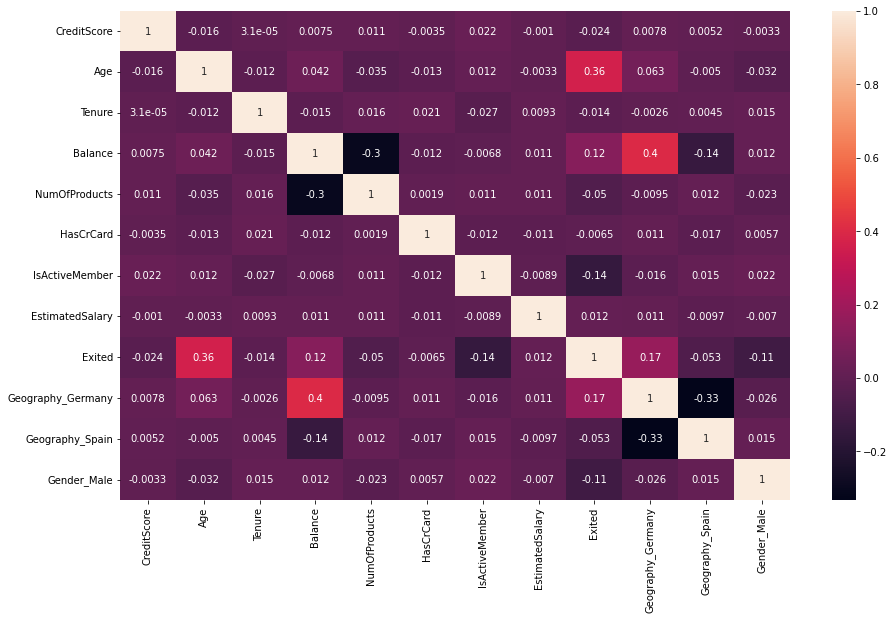

In [39]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [41]:
# Let's create an object of MinMax scaler
scaler = MinMaxScaler()

In [42]:
y = df['Exited']
X = df.drop(['Exited'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train[0].size

11

# Neural network training

In [ ]:
# Let's create an object of Sequential class to build a neural network architecture
model = Sequential()

# Let's add layers 
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# let's compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the neural network
model.fit(X_train,y_train, epochs=150, batch_size=10)

In [ ]:
# Evaluating the network
_, accuracy = model.evaluate(X_train, y_train)
print("Model accuracy: %.2f"% (accuracy*100))